In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')



Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [3]:


from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt



In [26]:


# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/gdrive/My Drive/mask_data/archive(8)/masks2.0/masks/train'
valid_path = '/content/gdrive/My Drive/mask_data/archive(8)/masks2.0/masks/test'



In [31]:
# useful for getting number of output classes
folders = glob('/content/gdrive/My Drive/mask_data/archive(8)/masks2.0/masks/train/*')
print(len(folders))





2


In [32]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [33]:
for layer in resnet.layers:
    layer.trainable = False

In [34]:
x = Flatten()(resnet.output)

In [35]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [36]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [37]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [39]:
training_set = train_datagen.flow_from_directory('/content/gdrive/My Drive/mask_data/archive(8)/masks2.0/masks/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 92 images belonging to 2 classes.


In [40]:
test_set = test_datagen.flow_from_directory('/content/gdrive/My Drive/mask_data/archive(8)/masks2.0/masks/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 33 images belonging to 2 classes.


In [41]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
3/3 [==============================] - 22s 7s/step - loss: 6.0138 - accuracy: 0.4783 - val_loss: 2.7763 - val_accuracy: 0.6667
Epoch 2/10
3/3 [==============================] - 15s 5s/step - loss: 6.2982 - accuracy: 0.5652 - val_loss: 3.8505 - val_accuracy: 0.6667
Epoch 3/10
3/3 [==============================] - 15s 5s/step - loss: 3.2115 - accuracy: 0.5435 - val_loss: 7.1722 - val_accuracy: 0.3333
Epoch 4/10
3/3 [==============================] - 15s 5s/step - loss: 4.6066 - accuracy: 0.4348 - val_loss: 0.7540 - val_accuracy: 0.6667
Epoch 5/10
3/3 [==============================] - 14s 5s/step - loss: 2.1278 - accuracy: 0.5652 - val_loss: 2.2442 - val_accuracy: 0.6667
Epoch 6/10
3/3 [==============================] - 14s 5s/step - loss: 1.7084 - accuracy: 0.5652 - val_loss: 2.6043 - val_accuracy: 0.3939
Epoch 7/10
3/3 [==============================] - 16s 5s/step - loss: 1.8034 - accuracy: 0.5217 - val_loss: 0.7732 - val_accuracy: 0.6667
Epoch 8/10
3/3 [==================

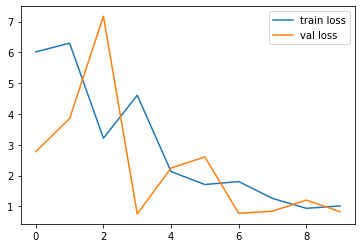

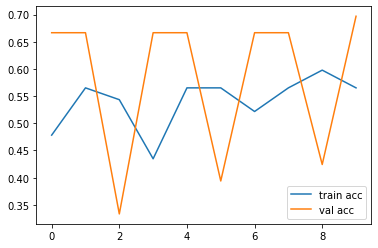

<Figure size 432x288 with 0 Axes>

In [42]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [43]:
import tensorflow as tf

from keras.models import load_model

model.save('model_res50.h5')